In [1]:
# Imports
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('default')
import os
from matplotlib.pyplot import text
from numpy import trapz

In [2]:
!sudo apt-get update
!sudo apt install cm-super dvipng texlive-latex-extra texlive-latex-recommended texlive texlive-fonts-recommended
import os
from matplotlib.pyplot import text
matplotlib.style.use('default')
from matplotlib import rc

rc('font', **{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

Hit:1 http://archive.ubuntu.com/ubuntu focal InRelease
Get:2 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Get:4 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Get:5 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Hit:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Hit:8 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Get:9 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease [18.1 kB]
Get:10 http://archive.ubuntu.com/ubuntu focal-updates/universe amd64 Packages [1,324 kB]
Hit:11 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease
Get:12 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 Packages [3,069 kB]
Hit:13 http://ppa.launchpad.net/ubuntugis/ppa/ubuntu focal InRelease
Get:14 h

In [3]:
save_dir = 'plots5'
saving_path = 'drive/MyDrive/myML/saves/' + save_dir + '/'

In [4]:
# Mount google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
try:
    os.mkdir(saving_path)
    print("saving_path directory created successfully")
except OSError as e:
    print("Error: %s" % (e.strerror))

Error: File exists


In [6]:
# AUC new calculation:
from scipy.spatial import ConvexHull, convex_hull_plot_2d

def calc_auc(pts_x_in, pts_y_in, start_x, end_x, start_y, end_y):
  ref_x = end_x
  ref_y = start_y

  pts_x = pts_x_in[:]
  pts_y = pts_y_in[:]

  pts_x.insert(0,start_x)
  pts_x.append(end_x)
  x_for_real = np.array(pts_x)
  pts_x.append(ref_x)
  x = np.array(pts_x)

  pts_y.insert(0,start_y)
  pts_y.append(end_y)
  y_for_real = np.array(pts_y)
  pts_y.append(ref_y)
  y = np.array(pts_y)

  points = np.vstack((x, y)).T
  hull = ConvexHull(points)
  convex_area = hull.volume

  # plt.plot(points[:,0], points[:,1], 'o')
  # for simplex in hull.simplices:
  #   plt.plot(points[simplex, 0], points[simplex, 1], 'k-')
  # # plt.show() 

  real_area = trapz(y_for_real, x_for_real)

  #area = PolyArea2D(pts)
  return convex_area, real_area

In [89]:
# some common plot parameters
ours_color = 'black'
ours_color2 = 'blue'
sanitizer_color = 'brown'
gap_color = 'magenta'
tiprdc_color = 'red'
noise_color = 'green'
lnoise_color = 'orange'

In [90]:
# Use Case 1 G-M
uc1_adv_acc_main_data = 0.968800241157556
uc1_utl_acc_main_data = 0.923683681672025

uc1_noise_var_values = [5, 10, 15, 20, 30, 60, 200]
uc1_adv_acc_values = [0.778084807, 0.732415595, 0.673884646, 0.644995981, 0.588776125, 0.533912781, 0.506832797]
uc1_adv_s_acc_values = [0.849326768, 0.791499196, 0.743770096, 0.716690113, 0.668961013, 0.624497588, 0.614549839]
uc1_utl_acc_values = [0.815966640, 0.821091238, 0.818327974, 0.815213023, 0.819232315, 0.809686495, 0.810741559]

uc1_adv_no_noise = 0.792202572
uc1_utl_no_noise = 0.778587219
uc1_adv_no_noise_no_g = 0.830938505
uc1_utl_no_noise_no_g = 0.837419614


In [91]:
# Use Case 1 Other Works:
uc1_sanitizer_adv = [0.639759036144578, 0.778915662650602]
uc1_sanitizer_utl = [0.717757009345794, 0.772897196261682]

uc1_gap_adv = [0.574698795180722, 0.946987951807228, 0.961445783132529, 0.980722891566264]
uc1_gap_utl = [0.517757009345794, 0.888785046728972, 0.900934579439252, 0.932710280373831]

uc1_tiprdc_adv = [0.574698795180722, 0.669277108433734, 0.955421686746987, 0.964457831325301]
uc1_tiprdc_utl = [0.517757009345794, 0.72803738317757, 0.86822429906542, 0.870093457943925]

uc1_noise_adv = [0.574698795180722, 0.616265060240963, 0.7, 0.798192771084337]
uc1_noise_utl = [0.517757009345794, 0.54018691588785, 0.59626168224299, 0.660747663551401]

uc1_lnoise_adv = [0.724096385542168, 0.956626506024096]
uc1_lnoise_utl = [0.61214953271028, 0.842990654205607]

uc1_sanitizer_adv_max = 0.989156626506023
uc1_sanitizer_utl_max = 0.950467289719626

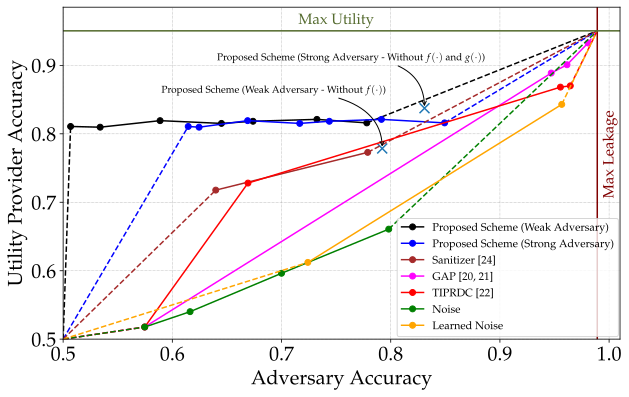

In [92]:
# UC1 Utility Pricavy Plot (G-M)
start_x = 0.5
start_y = 0.5
end_x = uc1_sanitizer_adv_max     #uc1_adv_acc_main_data
end_y = uc1_sanitizer_utl_max     #uc1_utl_acc_main_data

fig, ax = plt.subplots(figsize=(10,6))
matplotlib.rcParams.update({'font.size': 20})
# fig.tight_layout()
# plt.title("CelabA-G-M Utility Privacy Trade-off")
plt.plot(uc1_adv_acc_values, uc1_utl_acc_values, color=ours_color, label='Proposed Scheme (Weak Adversary)', marker='o')
plt.plot([start_x, uc1_adv_acc_values[6]], [start_y, uc1_utl_acc_values[6]], color=ours_color, linestyle = 'dashed')
plt.plot([uc1_adv_acc_values[0], end_x], [uc1_utl_acc_values[0], end_y], color=ours_color, linestyle = 'dashed')

plt.plot(uc1_adv_s_acc_values, uc1_utl_acc_values, color=ours_color2, label='Proposed Scheme (Strong Adversary)', marker='o')
plt.plot([start_x, uc1_adv_s_acc_values[6]], [start_y, uc1_utl_acc_values[6]], color=ours_color2, linestyle = 'dashed')
plt.plot([uc1_adv_s_acc_values[0], end_x], [uc1_utl_acc_values[0], end_y], color=ours_color2, linestyle = 'dashed')

plt.plot(uc1_sanitizer_adv, uc1_sanitizer_utl, color=sanitizer_color, label='Sanitizer [24]', marker='o')
plt.plot([start_x, uc1_sanitizer_adv[0]], [start_y, uc1_sanitizer_utl[0]], color=sanitizer_color, linestyle = 'dashed')
plt.plot([uc1_sanitizer_adv[1], end_x], [uc1_sanitizer_utl[1], end_y], color=sanitizer_color, linestyle = 'dashed')

plt.plot(uc1_gap_adv, uc1_gap_utl, color=gap_color, label='GAP [20, 21]', marker='o')
plt.plot([start_x, uc1_gap_adv[0]], [start_y, uc1_gap_utl[0]], color=gap_color, linestyle = 'dashed')
plt.plot([uc1_gap_adv[3], end_x], [uc1_gap_utl[3], end_y], color=gap_color, linestyle = 'dashed')

plt.plot(uc1_tiprdc_adv, uc1_tiprdc_utl, color=tiprdc_color, label='TIPRDC [22]', marker='o')
plt.plot([start_x, uc1_tiprdc_adv[0]], [start_y, uc1_tiprdc_utl[0]], color=tiprdc_color, linestyle = 'dashed')
plt.plot([uc1_tiprdc_adv[3], end_x], [uc1_tiprdc_utl[3], end_y], color=tiprdc_color, linestyle = 'dashed')

plt.plot(uc1_noise_adv, uc1_noise_utl, color=noise_color, label='Noise', marker='o')
plt.plot([start_x, uc1_noise_adv[0]], [start_y, uc1_noise_utl[0]], color=noise_color, linestyle = 'dashed')
plt.plot([uc1_noise_adv[3], end_x], [uc1_noise_utl[3], end_y], color=noise_color, linestyle = 'dashed')

plt.plot(uc1_lnoise_adv, uc1_lnoise_utl, color=lnoise_color, label='Learned Noise', marker='o')
plt.plot([start_x, uc1_lnoise_adv[0]], [start_y, uc1_lnoise_utl[0]], color=lnoise_color, linestyle = 'dashed')
plt.plot([uc1_lnoise_adv[1], end_x], [uc1_lnoise_utl[1], end_y], color=lnoise_color, linestyle = 'dashed')

adv = [uc1_adv_no_noise, uc1_adv_no_noise_no_g]
utl = [uc1_utl_no_noise, uc1_utl_no_noise_no_g]
ann = ['Proposed Scheme (Weak Adversary - Without $f(\cdot)$)', 'Proposed Scheme (Strong Adversary - Without $f(\cdot)$ and $g(\cdot)$)']
sizes = [100, 100]

plt.scatter(adv, utl, sizes, marker='x')
arrow = dict(arrowstyle="->", connectionstyle="angle3,angleA=0,angleB=-90")
plt.annotate(ann[0], (adv[0], utl[0]), xytext=(0.59, 0.86), arrowprops=arrow, fontsize="10")
plt.annotate(ann[1], (adv[1], utl[1]), xytext=(adv[1]-0.19, utl[1]+0.07), arrowprops=arrow, fontsize="10")

plt.xlabel("Adversary Accuracy")
plt.ylabel("Utility Provider Accuracy")
plt.xlim([0.5,1.01])
plt.ylim([0.5,0.985])
plt.grid(color = 'gray', linestyle = 'dotted', linewidth = 0.5)

plt.axvline(x=end_x, color='maroon')
plt.axhline(y=end_y, color='darkolivegreen')
text(end_x + 0.005, 0.77, "Max Leakage", rotation=90, verticalalignment='center', color='maroon', fontsize="15")
text(0.75, end_y + 0.01, "Max Utility", horizontalalignment='center', color='darkolivegreen', fontsize="15")

plt.legend(frameon=True, fontsize="11", loc=2, bbox_to_anchor=(0.5+0.09,0.5-0.12))
plt.savefig(saving_path + "UC1_UP_Tradeoff_plot.png", bbox_inches = 'tight')
plt.savefig(saving_path + "UC1_UP_Tradeoff_plot.svg", bbox_inches = 'tight')
plt.savefig(saving_path + "UC1_UP_Tradeoff_plot.eps", format='eps')
plt.show()

In [93]:
sc_area, sr_area = calc_auc(uc1_sanitizer_adv, uc1_sanitizer_utl, 0, end_x, 0, end_y)
tc_area, tr_area = calc_auc(uc1_tiprdc_adv, uc1_tiprdc_utl, 0, end_x, 0, end_y)
gc_area, gr_area = calc_auc(uc1_gap_adv, uc1_gap_utl, 0, end_x, 0, end_y)
nc_area, nr_area = calc_auc(uc1_noise_adv, uc1_noise_utl, 0, end_x, 0, end_y)
lc_area, lr_area = calc_auc(uc1_lnoise_adv, uc1_lnoise_utl, 0, end_x, 0, end_y)

oc_area, or_area = calc_auc(uc1_adv_s_acc_values, uc1_utl_acc_values, 0, end_x, 0, end_y)
print("s|convex area: " + "%.4f" % round(sc_area, 4) + "| real area: " + "%.4f" % round(sr_area, 4))
print("t|convex area: " + "%.4f" % round(tc_area, 4) + "| real area: " + "%.4f" % round(tr_area, 4))
print("g|convex area: " + "%.4f" % round(gc_area, 4) + "| real area: " + "%.4f" % round(gr_area, 4))
print("n|convex area: " + "%.4f" % round(nc_area, 4) + "| real area: " + "%.4f" % round(nr_area, 4))
print("l|convex area: " + "%.4f" % round(lc_area, 4) + "| real area: " + "%.4f" % round(lr_area, 4))
print("o|convex area: " + "%.4f" % round(oc_area, 4) + "| real area: " + "%.4f" % round(or_area, 4))

s|convex area: 0.5210| real area: 0.5145
t|convex area: 0.5121| real area: 0.4664
g|convex area: 0.4701| real area: 0.4491
n|convex area: 0.4701| real area: 0.4339
l|convex area: 0.4701| real area: 0.4200
o|convex area: 0.5790| real area: 0.4845


In [94]:
# Use Case 2 G-S
uc2_adv_acc_main_data = 0.968800241157556
uc2_utl_acc_main_data = 0.919262459807074

uc2_noise_var_values = [5, 10, 15, 20, 25, 30, 40, 60, 200]
uc2_adv_acc_values = [0.8040, 0.7308, 0.6699, 0.6183, 0.5904, 0.5704, 0.5396, 0.5344, 0.5066]
uc2_adv_s_acc_values = [0.8559, 0.8073, 0.7640, 0.7330, 0.7095, 0.6813, 0.6671, 0.6550, 0.6324, 0.6138]
uc2_utl_acc_values = [0.8673, 0.8778, 0.8780, 0.8675, 0.8600, 0.8522, 0.8573, 0.8625, 0.8566, 0.8454]
uc2_adv_s2_acc_values = [0.8942, 0.8559, 0.8073, 0.7640, 0.7330, 0.7095, 0.6813, 0.6671, 0.6550, 0.6324, 0.6215, 0.6158, 0.6138]
uc2_utl2_acc_values = [0.9892, 0.9824, 0.9432, 0.8860, 0.8319, 0.7785, 0.7421, 0.7145, 0.6865, 0.6251, 0.5941, 0.5583, 0.5328]

uc2_adv_s_no_noise = 0.8942
uc2_utl_no_noise = 0.8572
uc2_adv_s_no_noise_no_g = 0.895
uc2_utl_no_noise_no_g = 0.8828


In [95]:
# Use Case 2 Other Works:
uc2_sanitizer_adv = [0.573758865248227, 0.871631205673758]
uc2_sanitizer_utl = [0.682417582417582, 0.836263736263736]

uc2_gap_adv = [0.575177304964539, 0.946808510638297] #, 0.963829787234042]
uc2_gap_utl = [0.516483516483516, 0.827472527472527] #, 0.732967032967032]

uc2_tiprdc_adv = [0.578014184397163, 0.838297872340425, 0.95531914893617]
uc2_tiprdc_utl = [0.537362637362637, 0.758241758241758, 0.905494505494505]

uc2_noise_adv = [0.615602836879432, 0.7, 0.797163120567375]
uc2_noise_utl = [0.516483516483516, 0.607692307692307, 0.687912087912087]

uc2_lnoise_adv = [0.943262411347517, 0.988652482269503]
uc2_lnoise_utl = [0.516483516483516, 0.921978021978021]

uc2_sanitizer_adv_max = 0.987943262411347
uc2_sanitizer_utl_max = 0.949450549450549

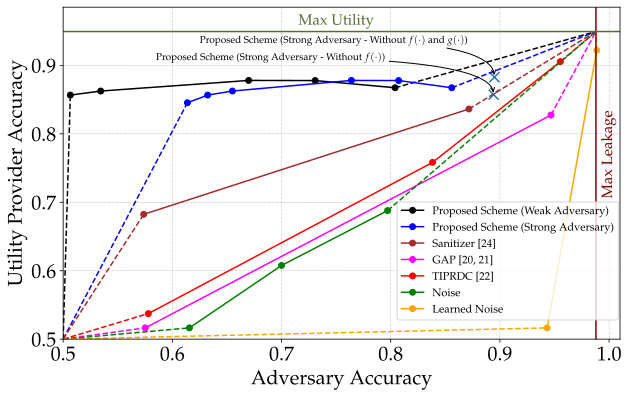

In [96]:
# UC2 Utility Pricavy Plot (G-S)
start_x = 0.5
start_y = 0.5
end_x = uc2_sanitizer_adv_max     #uc2_adv_acc_main_data
end_y = uc2_sanitizer_utl_max     #uc2_utl_acc_main_data

fig, ax = plt.subplots(figsize=(10,6))
matplotlib.rcParams.update({'font.size': 20})
# fig.tight_layout()
# plt.title("CelabA-G-S Utility Privacy Trade-off")
# plt.plot(uc2_adv_acc_values[:9], uc2_utl_acc_values[:9], color=ours_color, label='Proposed Scheme (Weak Adversary)', marker='o')
plt.plot([uc2_adv_acc_values[0],uc2_adv_acc_values[1],uc2_adv_acc_values[2],uc2_adv_acc_values[7],uc2_adv_acc_values[8]], [uc2_utl_acc_values[0],uc2_utl_acc_values[1],uc2_utl_acc_values[2],uc2_utl_acc_values[7],uc2_utl_acc_values[8]], color=ours_color, label='Proposed Scheme (Weak Adversary)', marker='o')
# plt.scatter([uc2_adv_acc_values[3],uc2_adv_acc_values[4],uc2_adv_acc_values[5],uc2_adv_acc_values[6]], [uc2_utl_acc_values[3],uc2_utl_acc_values[4],uc2_utl_acc_values[5],uc2_utl_acc_values[6]], color=ours_color, label='Ours (Against Weak Adversary)', marker='o')
plt.plot([start_x, uc2_adv_acc_values[8]], [start_y, uc2_utl_acc_values[8]], color=ours_color, linestyle = 'dashed')
plt.plot([uc2_adv_acc_values[0], end_x], [uc2_utl_acc_values[0], end_y], color=ours_color, linestyle = 'dashed')

# plt.plot(uc2_adv_s_acc_values, uc2_utl_acc_values, color=ours_color2, label='Proposed Scheme (Strong Adversary)', marker='o')
plt.plot([uc2_adv_s_acc_values[0],uc2_adv_s_acc_values[1],uc2_adv_s_acc_values[2],uc2_adv_s_acc_values[7],uc2_adv_s_acc_values[8],uc2_adv_s_acc_values[9]], [uc2_utl_acc_values[0],uc2_utl_acc_values[1],uc2_utl_acc_values[2],uc2_utl_acc_values[7],uc2_utl_acc_values[8],uc2_utl_acc_values[9]], color=ours_color2, label='Proposed Scheme (Strong Adversary)', marker='o')
# plt.scatter([uc2_adv_s_acc_values[3],uc2_adv_s_acc_values[4],uc2_adv_s_acc_values[5],uc2_adv_s_acc_values[6]], [uc2_utl_acc_values[3],uc2_utl_acc_values[4],uc2_utl_acc_values[5],uc2_utl_acc_values[6]], color=ours_color2, label='Ours (Against Strong Adversary)', marker='o')
plt.plot([start_x, uc2_adv_s_acc_values[9]], [start_y, uc2_utl_acc_values[9]], color=ours_color2, linestyle = 'dashed')
plt.plot([uc2_adv_s_acc_values[0], end_x], [uc2_utl_acc_values[0], end_y], color=ours_color2, linestyle = 'dashed')

plt.plot(uc2_sanitizer_adv, uc2_sanitizer_utl, color=sanitizer_color, label='Sanitizer [24]', marker='o')
plt.plot([start_x, uc2_sanitizer_adv[0]], [start_y, uc2_sanitizer_utl[0]], color=sanitizer_color, linestyle = 'dashed')
plt.plot([uc2_sanitizer_adv[1], end_x], [uc2_sanitizer_utl[1], end_y], color=sanitizer_color, linestyle = 'dashed')

plt.plot(uc2_gap_adv, uc2_gap_utl, color=gap_color, label='GAP [20, 21]', marker='o')
plt.plot([start_x, uc2_gap_adv[0]], [start_y, uc2_gap_utl[0]], color=gap_color, linestyle = 'dashed')
plt.plot([uc2_gap_adv[1], end_x], [uc2_gap_utl[1], end_y], color=gap_color, linestyle = 'dashed')

plt.plot(uc2_tiprdc_adv, uc2_tiprdc_utl, color=tiprdc_color, label='TIPRDC [22]', marker='o')
plt.plot([start_x, uc2_tiprdc_adv[0]], [start_y, uc2_tiprdc_utl[0]], color=tiprdc_color, linestyle = 'dashed')
plt.plot([uc2_tiprdc_adv[2], end_x], [uc2_tiprdc_utl[2], end_y], color=tiprdc_color, linestyle = 'dashed')

plt.plot(uc2_noise_adv, uc2_noise_utl, color=noise_color, label='Noise', marker='o')
plt.plot([start_x, uc2_noise_adv[0]], [start_y, uc2_noise_utl[0]], color=noise_color, linestyle = 'dashed')
plt.plot([uc2_noise_adv[2], end_x], [uc2_noise_utl[2], end_y], color=noise_color, linestyle = 'dashed')

plt.plot(uc2_lnoise_adv, uc2_lnoise_utl, color=lnoise_color, label='Learned Noise', marker='o')
plt.plot([start_x, uc2_lnoise_adv[0]], [start_y, uc2_lnoise_utl[0]], color=lnoise_color, linestyle = 'dashed')
plt.plot([uc2_lnoise_adv[1], end_x], [uc2_lnoise_utl[1], end_y], color=lnoise_color, linestyle = 'dashed')

# plt.plot(uc2_adv_s2_acc_values, uc2_utl2_acc_values, color='yellow', label='NEW', marker='o')
# plt.plot([start_x, uc2_adv_s2_acc_values[12]], [start_y, uc2_utl2_acc_values[12]], color='yellow', linestyle = 'dashed')
# plt.plot([uc2_adv_s2_acc_values[0], end_x], [uc2_utl2_acc_values[0], end_y], color='yellow', linestyle = 'dashed')

adv = [uc2_adv_s_no_noise, uc2_adv_s_no_noise_no_g]
utl = [uc2_utl_no_noise, uc2_utl_no_noise_no_g]
ann = ['Proposed Scheme (Strong Adversary - Without $f(\cdot)$)', 'Proposed Scheme (Strong Adversary - Without $f(\cdot)$ and $g(\cdot)$)']
sizes = [100, 100]

plt.scatter(adv, utl, sizes, marker='x')
arrow = dict(arrowstyle="->", connectionstyle="angle3,angleA=0,angleB=-90")
plt.annotate(ann[0], (adv[0], utl[0]), xytext=(adv[1]-0.31, utl[1]+0.025), arrowprops=arrow, fontsize="10")
plt.annotate(ann[1], (adv[1], utl[1]), xytext=(adv[1]-0.27, utl[1]+0.05), arrowprops=arrow, fontsize="10")

plt.xlabel("Adversary Accuracy")
plt.ylabel("Utility Provider Accuracy")
plt.xlim([0.5,1.01])
plt.ylim([0.5,0.985])
plt.grid(color = 'gray', linestyle = 'dotted', linewidth = 0.5)

plt.axvline(x=end_x, color='maroon')
plt.axhline(y=end_y, color='darkolivegreen')
text(end_x + 0.005, 0.77, "Max Leakage", rotation=90, verticalalignment='center', color='maroon', fontsize="15")
text(0.75, end_y + 0.01, "Max Utility", horizontalalignment='center', color='darkolivegreen', fontsize="15")

plt.legend(frameon=True, fontsize="11", loc=2, bbox_to_anchor=(0.5+0.09,0.5-0.07))

plt.savefig(saving_path + "UC2_UP_Tradeoff_plot.png", bbox_inches = 'tight')
plt.savefig(saving_path + "UC2_UP_Tradeoff_plot.svg", bbox_inches = 'tight')
plt.savefig(saving_path + "UC2_UP_Tradeoff_plot.eps", format='eps')
plt.show()

In [97]:
sc_area, sr_area = calc_auc(uc2_sanitizer_adv, uc2_sanitizer_utl, 0, end_x, 0, end_y)
tc_area, tr_area = calc_auc(uc2_tiprdc_adv, uc2_tiprdc_utl, 0, end_x, 0, end_y)
gc_area, gr_area = calc_auc(uc2_gap_adv, uc2_gap_utl, 0, end_x, 0, end_y)
nc_area, nr_area = calc_auc(uc2_noise_adv, uc2_noise_utl, 0, end_x, 0, end_y)
lc_area, lr_area = calc_auc(uc2_lnoise_adv, uc2_lnoise_utl, 0, end_x, 0, end_y)
oc_area, or_area = calc_auc(uc2_adv_s_acc_values, uc2_utl_acc_values, 0, end_x, 0, end_y)
print("s|convex area: " + "%.4f" % round(sc_area, 4) + "| real area: " + "%.4f" % round(sr_area, 4))
print("t|convex area: " + "%.4f" % round(tc_area, 4) + "| real area: " + "%.4f" % round(tr_area, 4))
print("g|convex area: " + "%.4f" % round(gc_area, 4) + "| real area: " + "%.4f" % round(gr_area, 4))
print("n|convex area: " + "%.4f" % round(nc_area, 4) + "| real area: " + "%.4f" % round(nr_area, 4))
print("l|convex area: " + "%.4f" % round(lc_area, 4) + "| real area: " + "%.4f" % round(lr_area, 4))
print("o|convex area: " + "%.4f" % round(oc_area, 4) + "| real area: " + "%.4f" % round(or_area, 4))

s|convex area: 0.5337| real area: 0.5258
t|convex area: 0.4690| real area: 0.4515
g|convex area: 0.4690| real area: 0.4348
n|convex area: 0.4690| real area: 0.4255
l|convex area: 0.4693| real area: 0.2756
o|convex area: 0.5963| real area: 0.4972


In [98]:
# Use Case 3 G-C
uc3_adv_acc_main_data = 0.968800241157556
uc3_utl_acc_main_data = 0.857968247588424

uc3_noise_var_values = [5, 10, 20, 30, 60, 200]
uc3_adv_acc_values = [0.796272106, 0.735781752, 0.629019293, 0.57857717, 0.524065514, 0.501607717]
uc3_adv_s_acc_values = [0.867664791, 0.811444936, 0.737992363, 0.683832395, 0.630576768, 0.613394293]
uc3_utl_acc_values = [0.799387058, 0.788886656, 0.736786576, 0.730556672, 0.7632, 0.7568]

uc3_adv_no_noise = 0.811595659
uc3_utl_no_noise = 0.796724277
uc3_adv_no_noise_no_g = 0.847166399
uc3_utl_no_noise_no_g = 0.821543408

In [99]:
# Use Case 3 Other Works:
uc3_sanitizer_adv = [0.57391304347826, 0.876086956521739]
uc3_sanitizer_utl = [0.653846153846153, 0.783516483516483]

uc3_gap_adv = [0.575362318840579, 0.951449275362318] #, 0.969565217391304]
uc3_gap_utl = [0.549450549450549, 0.706593406593406] #, 0.516483516483516]

uc3_tiprdc_adv = [0.578985507246376, 0.841304347826086, 0.960869565217391]
uc3_tiprdc_utl = [0.557142857142857, 0.724175824175824, 0.85054945054945]

uc3_noise_adv = [0.616666666666666, 0.702173913043478, 0.800724637681159]
uc3_noise_utl = [0.55054945054945, 0.603296703296703, 0.675824175824175]

uc3_lnoise_adv = [0.948550724637681, 0.994202898550724]
uc3_lnoise_utl = [0.55054945054945, 0.864835164835164]

uc3_sanitizer_adv_max = 0.994202898550724
uc3_sanitizer_utl_max = 0.947252747252747

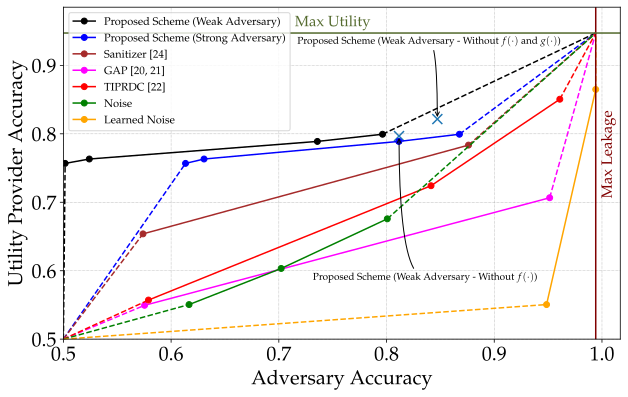

In [100]:
# UC3 Utility Pricavy Plot (G-C)
start_x = 0.5
start_y = 0.5
end_x = uc3_sanitizer_adv_max     #uc3_adv_acc_main_data
end_y = uc3_sanitizer_utl_max     #uc3_utl_acc_main_data

fig, ax = plt.subplots(figsize=(10,6))
matplotlib.rcParams.update({'font.size': 20})
# fig.tight_layout()
# plt.title("CelabA-G-C Utility Privacy Trade-off")
# plt.plot(uc3_adv_acc_values, uc3_utl_acc_values, color=ours_color, label='Proposed Scheme (Weak Adversary)', marker='o')
plt.plot([uc3_adv_acc_values[0],uc3_adv_acc_values[1],uc3_adv_acc_values[4],uc3_adv_acc_values[5]], [uc3_utl_acc_values[0],uc3_utl_acc_values[1],uc3_utl_acc_values[4],uc3_utl_acc_values[5]], color=ours_color, label='Proposed Scheme (Weak Adversary)', marker='o')
# plt.scatter([uc3_adv_acc_values[2],uc3_adv_acc_values[3]], [uc3_utl_acc_values[2],uc3_utl_acc_values[3]], color=ours_color, marker='o')
plt.plot([start_x, uc3_adv_acc_values[5]], [start_y, uc3_utl_acc_values[5]], color=ours_color, linestyle = 'dashed')
plt.plot([uc3_adv_acc_values[0], end_x], [uc3_utl_acc_values[0], end_y], color=ours_color, linestyle = 'dashed')

# plt.plot(uc3_adv_s_acc_values, uc3_utl_acc_values, color=ours_color2, label='Proposed Scheme (Strong Adversary)', marker='o')
plt.plot([uc3_adv_s_acc_values[0],uc3_adv_s_acc_values[1],uc3_adv_s_acc_values[4],uc3_adv_s_acc_values[5]], [uc3_utl_acc_values[0],uc3_utl_acc_values[1],uc3_utl_acc_values[4],uc3_utl_acc_values[5]], color=ours_color2, label='Proposed Scheme (Strong Adversary)', marker='o')
# plt.scatter([uc3_adv_s_acc_values[2],uc3_adv_s_acc_values[3]], [uc3_utl_acc_values[2],uc3_utl_acc_values[3]], color=ours_color2, marker='o')
plt.plot([start_x, uc3_adv_s_acc_values[5]], [start_y, uc3_utl_acc_values[5]], color=ours_color2, linestyle = 'dashed')
plt.plot([uc3_adv_s_acc_values[0], end_x], [uc3_utl_acc_values[0], end_y], color=ours_color2, linestyle = 'dashed')

plt.plot(uc3_sanitizer_adv, uc3_sanitizer_utl, color=sanitizer_color, label='Sanitizer [24]', marker='o')
plt.plot([start_x, uc3_sanitizer_adv[0]], [start_y, uc3_sanitizer_utl[0]], color=sanitizer_color, linestyle = 'dashed')
plt.plot([uc3_sanitizer_adv[1], end_x], [uc3_sanitizer_utl[1], end_y], color=sanitizer_color, linestyle = 'dashed')

plt.plot(uc3_gap_adv, uc3_gap_utl, color=gap_color, label='GAP [20, 21]', marker='o')
plt.plot([start_x, uc3_gap_adv[0]], [start_y, uc3_gap_utl[0]], color=gap_color, linestyle = 'dashed')
plt.plot([uc3_gap_adv[1], end_x], [uc3_gap_utl[1], end_y], color=gap_color, linestyle = 'dashed')

plt.plot(uc3_tiprdc_adv, uc3_tiprdc_utl, color=tiprdc_color, label='TIPRDC [22]', marker='o')
plt.plot([start_x, uc3_tiprdc_adv[0]], [start_y, uc3_tiprdc_utl[0]], color=tiprdc_color, linestyle = 'dashed')
plt.plot([uc3_tiprdc_adv[2], end_x], [uc3_tiprdc_utl[2], end_y], color=tiprdc_color, linestyle = 'dashed')

plt.plot(uc3_noise_adv, uc3_noise_utl, color=noise_color, label='Noise', marker='o')
plt.plot([start_x, uc3_noise_adv[0]], [start_y, uc3_noise_utl[0]], color=noise_color, linestyle = 'dashed')
plt.plot([uc3_noise_adv[2], end_x], [uc3_noise_utl[2], end_y], color=noise_color, linestyle = 'dashed')

plt.plot(uc3_lnoise_adv, uc3_lnoise_utl, color=lnoise_color, label='Learned Noise', marker='o')
plt.plot([start_x, uc3_lnoise_adv[0]], [start_y, uc3_lnoise_utl[0]], color=lnoise_color, linestyle = 'dashed')
plt.plot([uc3_lnoise_adv[1], end_x], [uc3_lnoise_utl[1], end_y], color=lnoise_color, linestyle = 'dashed')

adv = [uc3_adv_no_noise, uc3_adv_no_noise_no_g]
utl = [uc3_utl_no_noise, uc3_utl_no_noise_no_g]
ann = ['Proposed Scheme (Weak Adversary - Without $f(\cdot)$)', 'Proposed Scheme (Weak Adversary - Without $f(\cdot)$ and $g(\cdot)$)']
sizes = [100, 100]

plt.scatter(adv, utl, sizes, marker='x')
arrow = dict(arrowstyle="->", connectionstyle="angle3,angleA=0,angleB=-90")
plt.annotate(ann[0], (adv[0], utl[0]), xytext=(adv[0]-0.08, utl[0]-0.21), arrowprops=arrow, fontsize="10")
plt.annotate(ann[1], (adv[1], utl[1]), xytext=(adv[1]-0.13, utl[1]+0.11), arrowprops=arrow, fontsize="10")

plt.xlabel("Adversary Accuracy")
plt.ylabel("Utility Provider Accuracy")
plt.xlim([0.5,1.017])
plt.ylim([0.5,0.985])
plt.grid(color = 'gray', linestyle = 'dotted', linewidth = 0.5)

plt.axvline(x=end_x, color='maroon')
plt.axhline(y=end_y, color='darkolivegreen')
text(end_x + 0.005, 0.77, "Max Leakage", rotation=90, verticalalignment='center', color='maroon', fontsize="15")
text(0.75, end_y + 0.01, "Max Utility", horizontalalignment='center', color='darkolivegreen', fontsize="15")

plt.legend(frameon=True, fontsize="11")

plt.savefig(saving_path + "UC3_UP_Tradeoff_plot.png", bbox_inches = 'tight')
plt.savefig(saving_path + "UC3_UP_Tradeoff_plot.svg", bbox_inches = 'tight')
plt.savefig(saving_path + "UC3_UP_Tradeoff_plot.eps", format='eps')
plt.show()

In [101]:
sc_area, sr_area = calc_auc(uc3_sanitizer_adv, uc3_sanitizer_utl, 0, end_x, 0, end_y)
tc_area, tr_area = calc_auc(uc3_tiprdc_adv, uc3_tiprdc_utl, 0, end_x, 0, end_y)
gc_area, gr_area = calc_auc(uc3_gap_adv, uc3_gap_utl, 0, end_x, 0, end_y)
nc_area, nr_area = calc_auc(uc3_noise_adv, uc3_noise_utl, 0, end_x, 0, end_y)
lc_area, lr_area = calc_auc(uc3_lnoise_adv, uc3_lnoise_utl, 0, end_x, 0, end_y)
oc_area, or_area = calc_auc(uc3_adv_s_acc_values, uc3_utl_acc_values, 0, end_x, 0, end_y)
print("s|convex area: " + "%.4f" % round(sc_area, 4) + "| real area: " + "%.4f" % round(sr_area, 4))
print("t|convex area: " + "%.4f" % round(tc_area, 4) + "| real area: " + "%.4f" % round(tr_area, 4))
print("g|convex area: " + "%.4f" % round(gc_area, 4) + "| real area: " + "%.4f" % round(gr_area, 4))
print("n|convex area: " + "%.4f" % round(nc_area, 4) + "| real area: " + "%.4f" % round(nr_area, 4))
print("l|convex area: " + "%.4f" % round(lc_area, 4) + "| real area: " + "%.4f" % round(lr_area, 4))
print("o|convex area: " + "%.4f" % round(oc_area, 4) + "| real area: " + "%.4f" % round(or_area, 4))

s|convex area: 0.5241| real area: 0.5070
t|convex area: 0.4736| real area: 0.4535
g|convex area: 0.4715| real area: 0.4296
n|convex area: 0.4709| real area: 0.4391
l|convex area: 0.4709| real area: 0.2934
o|convex area: 0.5566| real area: 0.4780


In [102]:
# g plot (g0=-3000 g1=-1000 g2=-5000 g3=nog)
g_adv_acc_main_data = 0.968800241157556
g_utl_acc_main_data = 0.919262459807074

g_noise_var_values = [5, 10, 15, 20]
g0_adv_acc_values = [0.8040, 0.7308, 0.6699, 0.6183]
g0_utl_acc_values = [0.867363344, 0.877863746, 0.878014469, 0.867564309]
g1_adv_acc_values = [0.792654743, 0.72091037, 0.67664791, 0.642182476]
g1_utl_acc_values = [0.880426045, 0.881330386, 0.881280145, 0.841087219]
g2_adv_acc_values = [0.779993971, 0.733219453, 0.686243971, 0.616559486]
g2_utl_acc_values = [0.846613746, 0.866107315, 0.868619373, 0.868870579]
g3_adv_acc_values = [0.7980, 0.7198, 0.6546, 0.6061]
g3_utl_acc_values = [0.8915, 0.8896, 0.8400, 0.8153]

g0_adv_no_noise = 0.8440
g0_utl_no_noise = 0.857214630
g0_adv_no_noise_no_g = 0.8353
g0_utl_no_noise_no_g = 0.882837621
g1_adv_no_noise = 0.817122186
g1_utl_no_noise = 0.854350884
g1_adv_no_noise_no_g = 0.8353
g1_utl_no_noise_no_g = 0.882837621
g2_adv_no_noise = 0.821442926
g2_utl_no_noise = 0.811444936
g2_adv_no_noise_no_g = 0.8353
g2_utl_no_noise_no_g = 0.882837621
g3_adv_no_noise = 0.8353
g3_utl_no_noise = 0.882837621
g3_adv_no_noise_no_g = 0.8353
g3_utl_no_noise_no_g = 0.882837621

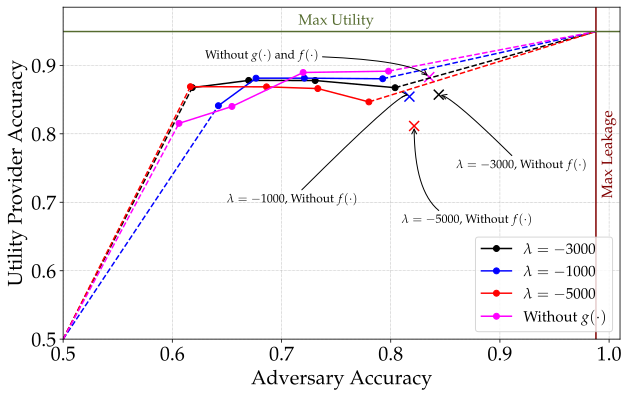

In [103]:
# g Plot (G-S)
start_x = 0.5
start_y = 0.5
end_x = uc2_sanitizer_adv_max     #g_adv_acc_main_data
end_y = uc2_sanitizer_utl_max     #g_utl_acc_main_data

fig, ax = plt.subplots(figsize=(10,6))
matplotlib.rcParams.update({'font.size': 20})
# fig.tight_layout()
# plt.title("CelabA-G-S Different values of g")
plt.plot(g0_adv_acc_values, g0_utl_acc_values, color='black', label='$\lambda = -3000$', marker='o')
plt.plot([start_x, g0_adv_acc_values[3]], [start_y, g0_utl_acc_values[3]], color='black', linestyle = 'dashed')
plt.plot([g0_adv_acc_values[0], end_x], [g0_utl_acc_values[0], end_y], color='black', linestyle = 'dashed')

plt.plot(g1_adv_acc_values, g1_utl_acc_values, color='blue', label='$\lambda = -1000$', marker='o')
plt.plot([start_x, g1_adv_acc_values[3]], [start_y, g1_utl_acc_values[3]], color='blue', linestyle = 'dashed')
plt.plot([g1_adv_acc_values[0], end_x], [g1_utl_acc_values[0], end_y], color='blue', linestyle = 'dashed')

plt.plot(g2_adv_acc_values, g2_utl_acc_values, color='red', label='$\lambda = -5000$', marker='o')
plt.plot([start_x, g2_adv_acc_values[3]], [start_y, g2_utl_acc_values[3]], color='red', linestyle = 'dashed')
plt.plot([g2_adv_acc_values[0], end_x], [g2_utl_acc_values[0], end_y], color='red', linestyle = 'dashed')

plt.plot(g3_adv_acc_values, g3_utl_acc_values, color='magenta', label='Without $g(\cdot)$', marker='o')
plt.plot([start_x, g3_adv_acc_values[3]], [start_y, g3_utl_acc_values[3]], color='magenta', linestyle = 'dashed')
plt.plot([g3_adv_acc_values[0], end_x], [g3_utl_acc_values[0], end_y], color='magenta', linestyle = 'dashed')

g0_adv = [g0_adv_no_noise]
g0_utl = [g0_utl_no_noise]
g1_adv = [g1_adv_no_noise]
g1_utl = [g1_utl_no_noise]
g2_adv = [g2_adv_no_noise]
g2_utl = [g2_utl_no_noise]
g3_adv = [g3_adv_no_noise_no_g]
g3_utl = [g3_utl_no_noise_no_g]
ann = ['$\lambda = -3000$, Without $f(\cdot)$','$\lambda = -1000$, Without $f(\cdot)$','$\lambda = -5000$, Without $f(\cdot)$', 'Without $g(\cdot)$ and $f(\cdot)$']
sizes = [100]

plt.scatter(g0_adv, g0_utl, sizes, marker='x', color='black')
plt.scatter(g1_adv, g1_utl, sizes, marker='x', color='blue')
plt.scatter(g2_adv, g2_utl, sizes, marker='x', color='red')
plt.scatter(g3_adv, g3_utl, sizes, marker='x', color='magenta')
arrow0 = dict(arrowstyle="->", connectionstyle="angle3,angleA=135,angleB=0")
arrow1 = dict(arrowstyle="->", connectionstyle="angle3,angleA=45,angleB=-90")
arrow2 = dict(arrowstyle="->", connectionstyle="angle3,angleA=0,angleB=-90")
arrow3 = dict(arrowstyle="->", connectionstyle="angle3,angleA=0,angleB=135")
plt.annotate(ann[0], (g0_adv[0], g0_utl[0]), xytext=(0.86, 0.75), arrowprops=arrow0, fontsize="12")
plt.annotate(ann[1], (g1_adv[0], g1_utl[0]), xytext=(0.65, 0.7), arrowprops=arrow1, fontsize="12")
plt.annotate(ann[2], (g2_adv[0], g2_utl[0]), xytext=(0.81, 0.67), arrowprops=arrow2, fontsize="12")
plt.annotate(ann[3], (g3_adv[0], g3_utl[0]), xytext=(0.63, 0.91), arrowprops=arrow3, fontsize="12")

plt.xlabel("Adversary Accuracy")
plt.ylabel("Utility Provider Accuracy")
plt.xlim([0.5,1.01])
plt.ylim([0.5,0.985])
plt.grid(color = 'gray', linestyle = 'dotted', linewidth = 0.5)

plt.axvline(x=end_x, color='maroon')
plt.axhline(y=end_y, color='darkolivegreen')
text(end_x + 0.005, 0.77, "Max Leakage", rotation=90, verticalalignment='center', color='maroon', fontsize="15")
text(0.75, end_y + 0.01, "Max Utility", horizontalalignment='center', color='darkolivegreen', fontsize="15")

plt.legend(frameon=True,loc=4, fontsize="15")

plt.savefig(saving_path + "g_plot.png", bbox_inches = 'tight')
plt.savefig(saving_path + "g_plot.svg", bbox_inches = 'tight')
plt.savefig(saving_path + "g_plot.eps", format='eps')
plt.show()

In [104]:
# p2r plot (p2r=183 (g=-3000), p2r=13 (g=-2000))
p2r_adv_acc_main_data = 0.968800241157556
p2r_utl_acc_main_data = 0.919262459807074

p2r_noise_var_values = [5, 10, 15, 20]
p2r183_adv_acc_values = [0.8040, 0.7308, 0.6699, 0.6183]
p2r183_utl_acc_values = [0.867363344, 0.877863746, 0.878014469, 0.867564309]
p2r13_adv_acc_values = [0.744674437, 0.703828376, 0.667051849, 0.632938103]
p2r13_utl_acc_values = [0.837520096, 0.826065113, 0.819885400, 0.821440916]

p2r183_adv_no_noise = 0.8440
p2r183_utl_no_noise = 0.857214630
p2r183_adv_no_noise_no_g = 0.8353
p2r183_utl_no_noise_no_g = 0.882837621
p2r13_adv_no_noise = 0.745880225
p2r13_utl_no_noise = 0.813404341
p2r13_adv_no_noise_no_g = 0.76823754
p2r13_utl_no_noise_no_g = 0.76823754

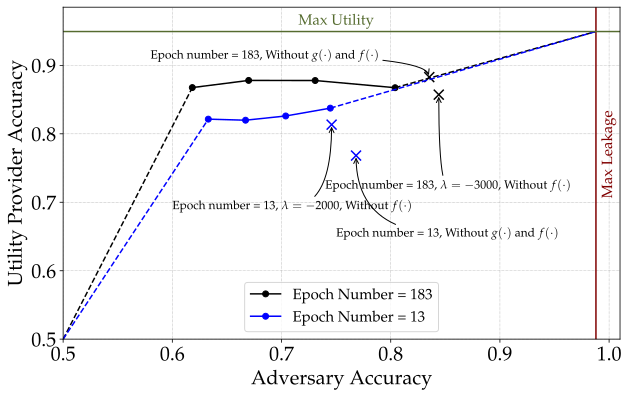

In [105]:
# p2r Plot (G-S)
start_x = 0.5
start_y = 0.5
end_x = uc2_sanitizer_adv_max     #g_adv_acc_main_data
end_y = uc2_sanitizer_utl_max     #g_utl_acc_main_data

fig, ax = plt.subplots(figsize=(10,6))
matplotlib.rcParams.update({'font.size': 20})
# fig.tight_layout()
# plt.title("CelabA-G-S Different values of model number")
plt.plot(p2r183_adv_acc_values, p2r183_utl_acc_values, color='black', label='Epoch Number = $183$', marker='o')
plt.plot([start_x, p2r183_adv_acc_values[3]], [start_y, p2r183_utl_acc_values[3]], color='black', linestyle = 'dashed')
plt.plot([p2r183_adv_acc_values[0], end_x], [p2r183_utl_acc_values[0], end_y], color='black', linestyle = 'dashed')

plt.plot(p2r13_adv_acc_values, p2r13_utl_acc_values, color='blue', label='Epoch Number = $13$', marker='o')
plt.plot([start_x, p2r13_adv_acc_values[3]], [start_y, p2r13_utl_acc_values[3]], color='blue', linestyle = 'dashed')
plt.plot([p2r13_adv_acc_values[0], end_x], [p2r13_utl_acc_values[0], end_y], color='blue', linestyle = 'dashed')

p2r183_adv = [p2r183_adv_no_noise, p2r183_adv_no_noise_no_g]
p2r183_utl = [p2r183_utl_no_noise, p2r183_utl_no_noise_no_g]
p2r13_adv = [p2r13_adv_no_noise, p2r13_adv_no_noise_no_g]
p2r13_utl = [p2r13_utl_no_noise, p2r13_utl_no_noise_no_g]
ann = ['Epoch number = $183$, $\lambda = -3000$, Without $f(\cdot)$', 'Epoch number = $183$, Without $g(\cdot)$ and $f(\cdot)$', 'Epoch number = $13$, $\lambda = -2000$, Without $f(\cdot)$', 'Epoch number = $13$, Without $g(\cdot)$ and $f(\cdot)$']
sizes = [100, 100]

plt.scatter(p2r183_adv, p2r183_utl, sizes, marker='x', color='black')
plt.scatter(p2r13_adv, p2r13_utl, sizes, marker='x', color='blue')

arrow = dict(arrowstyle="->", connectionstyle="angle3,angleA=0,angleB=-90")
plt.annotate(ann[0], (p2r183_adv[0], p2r183_utl[0]), xytext=(0.74, 0.72), arrowprops=arrow, fontsize="12")
plt.annotate(ann[1], (p2r183_adv[1], p2r183_utl[1]), xytext=(0.58, 0.91), arrowprops=arrow, fontsize="12")
plt.annotate(ann[2], (p2r13_adv[0], p2r13_utl[0]), xytext=(0.6, 0.69), arrowprops=arrow, fontsize="12")
plt.annotate(ann[3], (p2r13_adv[1], p2r13_utl[1]), xytext=(0.75, 0.65), arrowprops=arrow, fontsize="12")

plt.xlabel("Adversary Accuracy")
plt.ylabel("Utility Provider Accuracy")
plt.xlim([0.5,1.01])
plt.ylim([0.5,0.985])
plt.grid(color = 'gray', linestyle = 'dotted', linewidth = 0.5)

plt.axvline(x=end_x, color='maroon')
plt.axhline(y=end_y, color='darkolivegreen')
text(end_x + 0.005, 0.77, "Max Leakage", rotation=90, verticalalignment='center', color='maroon', fontsize="15")
text(0.75, end_y + 0.01, "Max Utility", horizontalalignment='center', color='darkolivegreen', fontsize="15")

plt.legend(frameon=True, fontsize="15")

plt.savefig(saving_path + "p2r_plot.png", bbox_inches = 'tight')
plt.savefig(saving_path + "p2r_plot.svg", bbox_inches = 'tight')
plt.savefig(saving_path + "p2r_plot.eps", format='eps')
plt.show()

In [106]:
# Strong adversary vs weak adversary plot (G-S) (p2r=183 (g=-3000))
adv2_adv_acc_main_data = 0.968800241157556
adv2_utl_acc_main_data = 0.919262459807074

upvn_noise = [0, 5, 10, 15, 20, 25, 30, 35, 40, 60, 80, 120, 200]
upvn_advw_l30 = [0.8440, 0.8040, 0.7308, 0.6699, 0.6183, 0.5904, 0.5704, 0.5396, 0.5344, 0.5066, 0.4888, 0.4683, 0.4679]
upvn_advs_l30 = [0.8942, 0.8559, 0.8073, 0.7640, 0.7330, 0.7095, 0.6813, 0.6671, 0.6550, 0.6324, 0.6215, 0.6158, 0.6138]
upvn_util_l30 = [0.8572, 0.8673, 0.8778, 0.8780, 0.8675, 0.8600, 0.8522, 0.8573, 0.8625, 0.8566, 0.8436, 0.8383, 0.8454]

adv2_noise_var_values = [5, 10, 15, 20, 25, 30, 35, 40, 60, 80, 120, 200]
adv1_adv_acc_values = [0.8040, 0.7308, 0.6699, 0.6183, 0.5904, 0.5704, 0.5396, 0.5344, 0.5066, 0.4888, 0.4683, 0.4679]
adv1_utl_acc_values = [0.8673, 0.8778, 0.8780, 0.8675, 0.8600, 0.8522, 0.8573, 0.8625, 0.8566, 0.8436, 0.8383, 0.8454]
adv2_adv_acc_values = [0.8559, 0.8073, 0.7640, 0.7330, 0.7095, 0.6813, 0.6671, 0.6550, 0.6324, 0.6215, 0.6158, 0.6138]

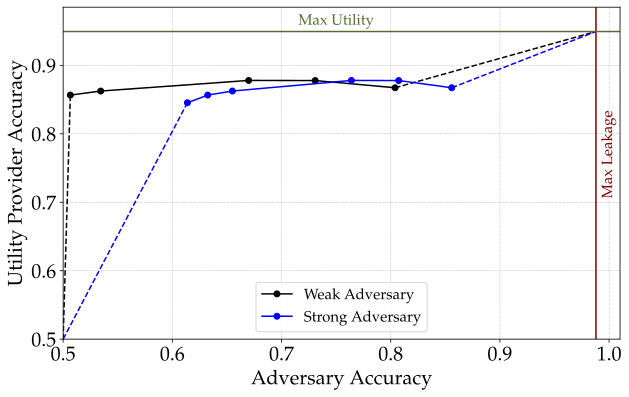

In [107]:
# Strong adversary vs weak adversary Plot (G-S)
start_x = 0.5
start_y = 0.5
end_x = uc2_sanitizer_adv_max     #g_adv_acc_main_data
end_y = uc2_sanitizer_utl_max     #g_utl_acc_main_data

fig, ax = plt.subplots(figsize=(10,6))
matplotlib.rcParams.update({'font.size': 20})
# fig.tight_layout()
# plt.title("CelabA-G-S strong adversary vs weak adversary")
# plt.plot(adv1_adv_acc_values[:9], adv1_utl_acc_values[:9], color='black', label='Weak Adversary', marker='o')
# plt.plot([start_x, adv1_adv_acc_values[8]], [start_y, adv1_utl_acc_values[8]], color='black', linestyle = 'dashed')
# plt.plot([adv1_adv_acc_values[0], end_x], [adv1_utl_acc_values[0], end_y], color='black', linestyle = 'dashed')

# plt.plot(adv2_adv_acc_values, adv1_utl_acc_values, color='blue', label='Strong Adversary', marker='o')
# plt.plot([start_x, adv2_adv_acc_values[11]], [start_y, adv1_utl_acc_values[11]], color='blue', linestyle = 'dashed')
# plt.plot([adv2_adv_acc_values[0], end_x], [adv1_utl_acc_values[0], end_y], color='blue', linestyle = 'dashed')

# plt.plot(uc2_adv_acc_values[:9], uc2_utl_acc_values[:9], color=ours_color, label='Weak Adversary', marker='o')
plt.plot([uc2_adv_acc_values[0],uc2_adv_acc_values[1],uc2_adv_acc_values[2],uc2_adv_acc_values[7],uc2_adv_acc_values[8]], [uc2_utl_acc_values[0],uc2_utl_acc_values[1],uc2_utl_acc_values[2],uc2_utl_acc_values[7],uc2_utl_acc_values[8]], color=ours_color, label='Weak Adversary', marker='o')
# plt.scatter([uc2_adv_acc_values[3],uc2_adv_acc_values[4],uc2_adv_acc_values[5],uc2_adv_acc_values[6]], [uc2_utl_acc_values[3],uc2_utl_acc_values[4],uc2_utl_acc_values[5],uc2_utl_acc_values[6]], color=ours_color, label='Weak Adversary', marker='o')
plt.plot([start_x, uc2_adv_acc_values[8]], [start_y, uc2_utl_acc_values[8]], color=ours_color, linestyle = 'dashed')
plt.plot([uc2_adv_acc_values[0], end_x], [uc2_utl_acc_values[0], end_y], color=ours_color, linestyle = 'dashed')

# plt.plot(uc2_adv_s_acc_values, uc2_utl_acc_values, color=ours_color2, label='Strong Adversary', marker='o')
plt.plot([uc2_adv_s_acc_values[0],uc2_adv_s_acc_values[1],uc2_adv_s_acc_values[2],uc2_adv_s_acc_values[7],uc2_adv_s_acc_values[8],uc2_adv_s_acc_values[9]], [uc2_utl_acc_values[0],uc2_utl_acc_values[1],uc2_utl_acc_values[2],uc2_utl_acc_values[7],uc2_utl_acc_values[8],uc2_utl_acc_values[9]], color=ours_color2, label='Strong Adversary', marker='o')
# plt.scatter([uc2_adv_s_acc_values[3],uc2_adv_s_acc_values[4],uc2_adv_s_acc_values[5],uc2_adv_s_acc_values[6]], [uc2_utl_acc_values[3],uc2_utl_acc_values[4],uc2_utl_acc_values[5],uc2_utl_acc_values[6]], color=ours_color2, label='Strong Adversary', marker='o')
plt.plot([start_x, uc2_adv_s_acc_values[9]], [start_y, uc2_utl_acc_values[9]], color=ours_color2, linestyle = 'dashed')
plt.plot([uc2_adv_s_acc_values[0], end_x], [uc2_utl_acc_values[0], end_y], color=ours_color2, linestyle = 'dashed')

plt.xlabel("Adversary Accuracy")
plt.ylabel("Utility Provider Accuracy")
plt.xlim([0.5,1.01])
plt.ylim([0.5,0.985])
plt.grid(color = 'gray', linestyle = 'dotted', linewidth = 0.5)

plt.axvline(x=end_x, color='maroon')
plt.axhline(y=end_y, color='darkolivegreen')
text(end_x + 0.005, 0.77, "Max Leakage", rotation=90, verticalalignment='center', color='maroon', fontsize="15")
text(0.75, end_y + 0.01, "Max Utility", horizontalalignment='center', color='darkolivegreen', fontsize="15")

plt.legend(frameon=True, fontsize="15")

plt.savefig(saving_path + "strong_adv_plot.png", bbox_inches = 'tight')
plt.savefig(saving_path + "strong_adv_plot.svg", bbox_inches = 'tight')
plt.savefig(saving_path + "strong_adv_plot.eps", format='eps')
plt.show()

In [108]:
upvn_noise = [0, 5, 10, 15, 20, 25, 30, 35, 40, 60, 80, 120, 200]
upvn_advw_l30 = [0.8440, 0.8040, 0.7308, 0.6699, 0.6183, 0.5904, 0.5704, 0.5396, 0.5344, 0.5066, 0.4888, 0.4683, 0.4679]
upvn_advs_l30 = [0.8942, 0.8559, 0.8073, 0.7640, 0.7330, 0.7095, 0.6813, 0.6671, 0.6550, 0.6324, 0.6215, 0.6158, 0.6138]
upvn_util_l30 = [0.8572, 0.8673, 0.8778, 0.8780, 0.8675, 0.8600, 0.8522, 0.8573, 0.8625, 0.8566, 0.8436, 0.8383, 0.8454]
upvn_advw_nol = [0.8353, 0.7980, 0.7198, 0.6546, 0.6061, 0.5767, 0.5495, 0.5433, 0.5228, 0.5024, 0.4838, 0.4746, 0.4668]
upvn_advs_nol = [0.8949, 0.8573, 0.8057, 0.7622, 0.7293, 0.7052, 0.6839, 0.6703, 0.6499, 0.6315, 0.6216, 0.6156, 0.6133]
upvn_util_nol = [0.8828, 0.8915, 0.8896, 0.8400, 0.8153, 0.8400, 0.8370, 0.8450, 0.8283, 0.8307, 0.8280, 0.8138, 0.7480]


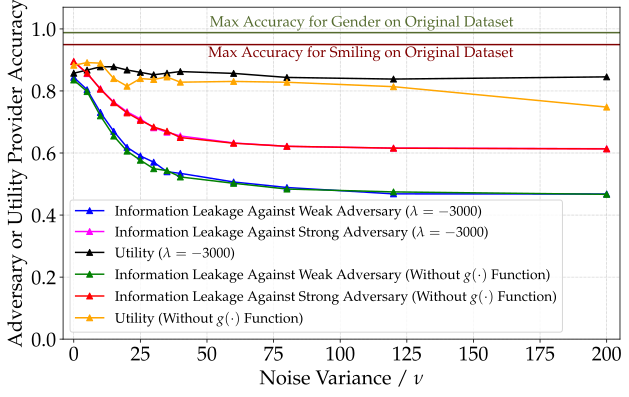

In [109]:
# Privacy Metric and Utility Metrics for strong and wead adversaries Against variance Plot
fig, ax = plt.subplots(figsize=(10,6))
matplotlib.rcParams.update({'font.size': 20})
# fig.tight_layout()
# plt.title("Privacy & Utulity Metric for Different Levels of Noise (weak and strong adversaries)")
lns1 = plt.plot(upvn_noise, upvn_advw_l30, color='blue', label='Information Leakage Against Weak Adversary ($\lambda=-3000$)', marker='^')
lns2 = plt.plot(upvn_noise, upvn_advs_l30, color='magenta', label='Information Leakage Against Strong Adversary ($\lambda=-3000$)', marker='^')
lns3 = plt.plot(upvn_noise, upvn_util_l30, color='black', label='Utility ($\lambda=-3000$)', marker='^')
lns4 = plt.plot(upvn_noise, upvn_advw_nol , color='green', label='Information Leakage Against Weak Adversary (Without $g(\cdot)$ Function)', marker='^')
lns5 = plt.plot(upvn_noise, upvn_advs_nol , color='red', label='Information Leakage Against Strong Adversary (Without $g(\cdot)$ Function)', marker='^')
lns6 = plt.plot(upvn_noise, upvn_util_nol , color='orange', label='Utility (Without $g(\cdot)$ Function)', marker='^')
plt.xlabel(r'Noise Variance /  $\nu$')
plt.ylabel("Adversary or Utility Provider Accuracy")
plt.xlim([-4,205])
plt.ylim([0,1.07])
plt.grid(color = 'gray', linestyle = 'dotted', linewidth = 0.5)

plt.axhline(y=uc2_sanitizer_adv_max, color='darkolivegreen')
plt.axhline(y=uc2_sanitizer_utl_max, color='maroon')
text(165, uc2_sanitizer_adv_max + 0.02, "Max Accuracy for Gender on Original Dataset", horizontalalignment='right', color='darkolivegreen', fontsize="15")
text(165, uc2_sanitizer_utl_max - 0.04, "Max Accuracy for Smiling on Original Dataset", horizontalalignment='right', color='maroon', fontsize="15")

plt.legend(frameon=True, fontsize="14")
plt.savefig(saving_path + "UorP_vs_noise_plot.png", bbox_inches = 'tight')
plt.savefig(saving_path + "UorP_vs_noise_plot.svg", bbox_inches = 'tight')
plt.savefig(saving_path + "UorP_vs_noise_plot.eps", format='eps')
plt.show()

In [110]:
print(uc2_sanitizer_adv_max - upvn_advs_nol[0])
print(uc2_sanitizer_utl_max - upvn_util_nol[0])

0.09304326241134697
0.06665054945054893


In [111]:
# Smooth version

s_upvn_noise = [0, 5, 10, 15, 20, 25, 30, 35, 40, 60, 80, 120, 200]
s_upvn_advw_l30 = [0.8440, 0.8040, 0.7308, 0.6699, 0.6183, 0.5904, 0.5704, 0.5396, 0.5344, 0.5066, 0.4888, 0.4683, 0.4679]
s_upvn_advs_l30 = [0.8942, 0.8559, 0.8073, 0.7640, 0.7330, 0.7095, 0.6813, 0.6671, 0.6550, 0.6324, 0.6215, 0.6158, 0.6138]
s_upvn_util_l30 = [0.8572, 0.8673, 0.8778, 0.8780, 0.8675, 0.8600, 0.8522, 0.8573, 0.8625, 0.8566, 0.8436, 0.8383, 0.8454]
s_upvn_advw_nol = [0.8353, 0.7980, 0.7198, 0.6546, 0.6061, 0.5767, 0.5495, 0.5433, 0.5228, 0.5024, 0.4838, 0.4746, 0.4668]
s_upvn_advs_nol = [0.8949, 0.8573, 0.8057, 0.7622, 0.7293, 0.7052, 0.6839, 0.6703, 0.6499, 0.6315, 0.6216, 0.6156, 0.6133]
s_upvn_noise_for_smooth_utl = [0, 5, 10, 15, 20, 25, 35, 40, 200]
s_upvn_util_nol = [0.8828, 0.8915, 0.8896, 0.8400, 0.8153, 0.8026, 0.7886, 0.7833, 0.7480]

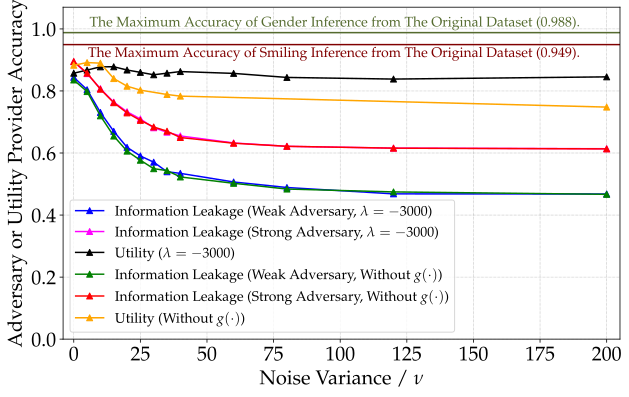

In [112]:
# Privacy Metric and Utility Metrics for strong and wead adversaries Against variance Plot
fig, ax = plt.subplots(figsize=(10,6))
matplotlib.rcParams.update({'font.size': 20})
# fig.tight_layout()
# plt.title("Privacy & Utulity Metric for Different Levels of Noise (weak and strong adversaries)")
lns1 = plt.plot(s_upvn_noise, s_upvn_advw_l30, color='blue', label='Information Leakage (Weak Adversary, $\lambda=-3000$)', marker='^')
lns2 = plt.plot(s_upvn_noise, s_upvn_advs_l30, color='magenta', label='Information Leakage (Strong Adversary, $\lambda=-3000$)', marker='^')
lns3 = plt.plot(s_upvn_noise, s_upvn_util_l30, color='black', label='Utility ($\lambda=-3000$)', marker='^')
lns4 = plt.plot(s_upvn_noise, s_upvn_advw_nol , color='green', label='Information Leakage (Weak Adversary, Without $g(\cdot)$)', marker='^')
lns5 = plt.plot(s_upvn_noise, s_upvn_advs_nol , color='red', label='Information Leakage (Strong Adversary, Without $g(\cdot)$)', marker='^')
lns6 = plt.plot(s_upvn_noise_for_smooth_utl, s_upvn_util_nol , color='orange', label='Utility (Without $g(\cdot)$)', marker='^')
plt.xlabel(r'Noise Variance /  $\nu$')
plt.ylabel("Adversary or Utility Provider Accuracy")
plt.xlim([-4,205])
plt.ylim([0,1.07])
plt.grid(color = 'gray', linestyle = 'dotted', linewidth = 0.5)

plt.axhline(y=uc2_sanitizer_adv_max, color='darkolivegreen')
plt.axhline(y=uc2_sanitizer_utl_max, color='maroon')
text(190, uc2_sanitizer_adv_max + 0.02, "The Maximum Accuracy of Gender Inference from The Original Dataset (0.988).", horizontalalignment='right', color='darkolivegreen', fontsize="14")
text(190, uc2_sanitizer_utl_max - 0.04, "The Maximum Accuracy of Smiling Inference from The Original Dataset (0.949).", horizontalalignment='right', color='maroon', fontsize="14")

plt.legend(frameon=True, fontsize="14")
plt.savefig(saving_path + "UorP_vs_noise_plot_s.png", bbox_inches = 'tight')
plt.savefig(saving_path + "UorP_vs_noise_plot_s.svg", bbox_inches = 'tight')
plt.savefig(saving_path + "UorP_vs_noise_plot_s.eps", format='eps')
plt.show()